# Graduate Admission Dataset

In [1]:
# Importing libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-12-10 12:15:53.596918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 12:15:53.694341: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 12:15:53.775219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 12:15:54.349679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("data/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df = df.drop(columns=["Serial No."])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = Sequential()

model.add(Dense(10, activation="relu", input_dim=7))
model.add(Dense(10, activation="relu"))

model.add(Dense(1, activation="linear"))

/home/anish/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733813191.603890   83689 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733813199.623050   83689 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733813199.628783   83689 cuda_executo

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [10]:
history = model.fit(X_train_scaled, y_train, epochs=25, validation_split=0.2)

Epoch 1/25


I0000 00:00:1733813230.650578   84398 service.cc:146] XLA service 0x7f9ed40031d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733813230.650733   84398 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-12-10 12:17:11.648458: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-10 12:17:16.190186: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
I0000 00:00:1733813250.739426   84398 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - loss: 1.2858 - val_loss: 0.8649
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7456 - val_loss: 0.4534
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3977 - val_loss: 0.2078
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1806 - val_loss: 0.0862
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - val_loss: 0.0460
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - val_loss: 0.0427
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0349 - val_loss: 0.0452
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - val_loss: 0.0424
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - val_loss: 0.0377
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0328
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - val_loss: 0.0295
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - val_loss: 0.02

In [11]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [12]:
r2_score(y_test, y_pred)

0.5520484479575622

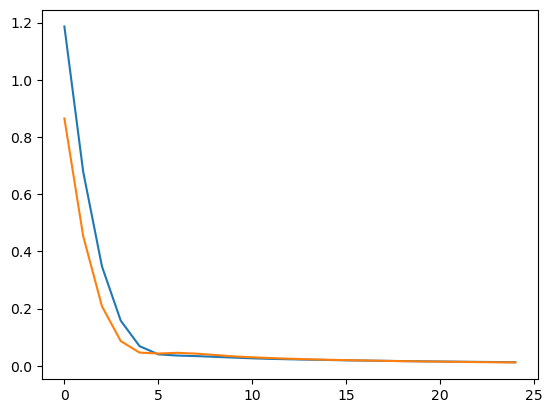

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])